<a href="https://colab.research.google.com/github/ZeleOeO/AI-News-Classifier/blob/main/News_Categoriser_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

url="https://github.com/codebasics/nlp-tutorials/blob/main/11_bag_of_n_grams/news_dataset.json?raw=true"
df = pd.read_json(url)
df.shape

(12695, 2)

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)

  filtered_tokens=[]

  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  
  return " ".join(filtered_tokens)

In [9]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

Converting it to equal forms or something
I don't know what it's called

In [10]:
min_samples = 1381

df[df.category=="BUSINESS"] = df[df.category=="BUSINESS"].sample(min_samples, random_state=2023)
df[df.category=="SPORTS"] = df[df.category=="SPORTS"].sample(min_samples, random_state=2023)
df[df.category=="CRIME"] = df[df.category=="CRIME"].sample(min_samples, random_state=2023)
df = df.dropna()
df.category.value_counts()

SCIENCE     1381
BUSINESS    1381
SPORTS      1381
CRIME       1381
Name: category, dtype: int64

In [11]:
df["category_num"] = df.category.map({
    "BUSINESS":0,
    "SPORTS":1,
    "CRIME":2,
    "SCIENCE":3
})

df

<ipython-input-11-a88c5b36467c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category_num"] = df.category.map({


,text,category,category_num
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3
9,Here's Why Coffee Makes You Have To Poop It hi...,SCIENCE,3
11,Bad News For Trump Is Good News For The Stock ...,BUSINESS,0
19,ESPN's Interruption Of Dabo Swinney Interview ...,SPORTS,1
...,...,...,...
12684,Woman Shot By Former Boyfriend At Chicago Nord...,CRIME,2
12687,"Get Even I was in debt. Serious debt. The ""how...",BUSINESS,0
12689,5-Year-Old Girl Abandoned At NYC Bus Terminal;...,CRIME,2
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE,3


In [12]:
df["pre_processed_text"] = df.text.apply(preprocess)

In [13]:
df.head()

,text,category,category_num,pre_processed_text
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3,watch Schrödinger Cat Die University Californi...
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3,WATCH Freaky vortex open Flooded Lake
9,Here's Why Coffee Makes You Have To Poop It hi...,SCIENCE,3,Coffee make Poop hit minute cup
11,Bad News For Trump Is Good News For The Stock ...,BUSINESS,0,Bad News Trump good News Stock Market slight b...
19,ESPN's Interruption Of Dabo Swinney Interview ...,SPORTS,1,ESPN Interruption Dabo Swinney Interview Frigg...


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(
    df.pre_processed_text,
    df.category_num,
    test_size = 0.2,
    random_state=2023,
    stratify = df.category_num
)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

model = MultinomialNB()
vec = CountVectorizer()

clf = Pipeline([
    ("vectorizer_bow", vec),
    ("Multi NB", model)
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       276
           1       0.90      0.86      0.88       276
           2       0.85      0.92      0.88       276
           3       0.92      0.82      0.87       277

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



In [20]:
news = [
    "Two men shot and killed at Johannesburg",
    "Stock Market Crashing",
    "Arsenal to beat Tottenham at Europa League",
    "How Peter Obi spent Easter in detention in London",
    "Fuel price soars by 81% despite N6tn subsidy payment",
    "National Assembly proposes jail terms for Ponzi scheme promoters",
    "How gunmen abducted Kogi monarch, killed female domestic worker - Police",
    "PDP conducts Bayelsa gov election primaries",
    "INEC to reset 2,500 BVAS for supplementary polls",
    "Bidding process for Man United enters third round ",
    "UCL: Napoli confident of victory without Osimhen - Di Lorenzo ",
    "Victory as thirteen men killed on bridge",
    "Videos of gold nanoparticles snapping together show how some crystals grow ",
    "This sea cucumber shoots sticky tubes out of its butt. Its genes hint at how",
    "Dense crowds of pedestrians shift into surprisingly orderly lines. Math explains why "
]

news_count = vec.transform([preprocess(i) for i in news])

for index, i in enumerate(model.predict(news_count)):
  if i == 0:
    print(news[index], " |   BUSINESS NEWS", "\t\t\t\t", i)
  elif i == 1:
    print(news[index], " |   SPORTS NEWS", "\t\t\t\t", i)
  elif i == 2:
    print(news[index], " |   CRIME NEWS", "\t\t\t\t", i)
  elif i == 3:
    print(news[index], " |   SCIENCE NEWS", "\t\t\t\t", i)

Two men shot and killed at Johannesburg  |   CRIME NEWS 				 2
Stock Market Crashing  |   BUSINESS NEWS 				 0
Arsenal to beat Tottenham at Europa League  |   SPORTS NEWS 				 1
How Peter Obi spent Easter in detention in London  |   CRIME NEWS 				 2
Fuel price soars by 81% despite N6tn subsidy payment  |   BUSINESS NEWS 				 0
National Assembly proposes jail terms for Ponzi scheme promoters  |   BUSINESS NEWS 				 0
How gunmen abducted Kogi monarch, killed female domestic worker - Police  |   CRIME NEWS 				 2
PDP conducts Bayelsa gov election primaries  |   BUSINESS NEWS 				 0
INEC to reset 2,500 BVAS for supplementary polls  |   SCIENCE NEWS 				 3
Bidding process for Man United enters third round   |   CRIME NEWS 				 2
UCL: Napoli confident of victory without Osimhen - Di Lorenzo   |   SPORTS NEWS 				 1
Victory as thirteen men killed on bridge  |   CRIME NEWS 				 2
Videos of gold nanoparticles snapping together show how some crystals grow   |   SCIENCE NEWS 				 3
This sea cucu

#Confuion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[246,  10,  16,   4],
       [ 14, 237,  18,   7],
       [  8,   6, 254,   8],
       [ 29,   9,  11, 228]])

Text(95.72222222222221, 0.5, 'Truth')

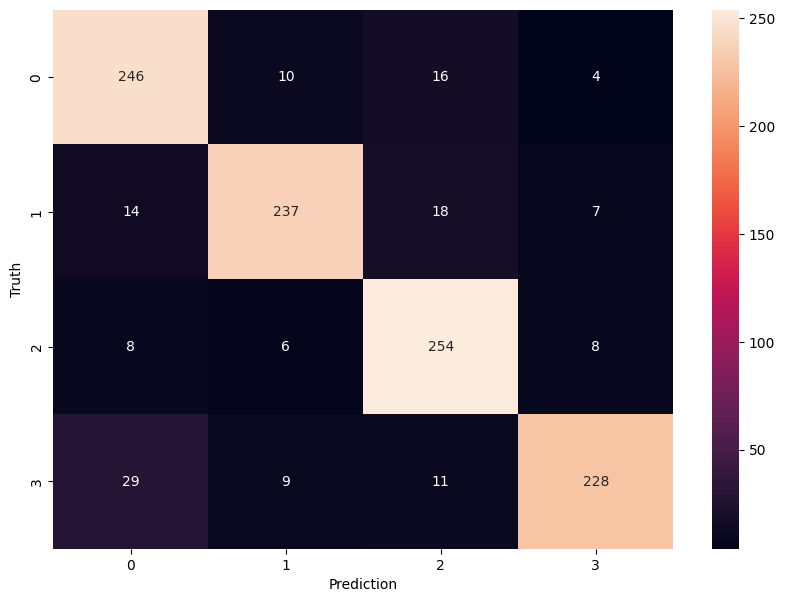

In [22]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')